In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
path = '/content/drive/MyDrive/Data science'
os.chdir(path)

Mounted at /content/drive


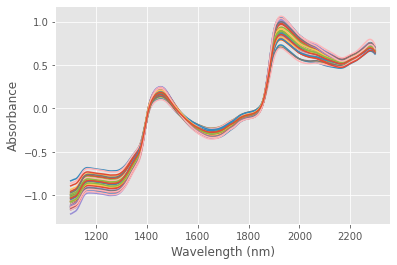

In [ ]:
#data = pd.read_csv('C:/Users/bertr/Downloads/Code Lectures/peach_spectra_brix.csv')
data = pd.read_csv('peach_spectra_brix.csv')
X = data.values[:,1:]
y = data['Brix']
wl = np.arange(1100,2300,2) # wavelengths
# Plot absorbance spectra
with plt.style.context(('ggplot')):
    plt.plot(wl, X.T)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Absorbance')
plt.show()

In [ ]:
def pcr(X,y):
    ''' Principal Component Regression in Python'''
    ''' Step 1: PCA on input data'''
    # Define the PCA object
    pca = PCA(n_components=0.95, svd_solver="full")
    # Preprocessing (1): first derivative
    d1X = savgol_filter(X, 25, polyorder = 5, deriv=1)
    # Preprocess (2) Standardize features by removing the mean and scaling to unit variance
    Xstd = StandardScaler().fit_transform(d1X[:,:])
    # Run PCA producing the reduced variable Xred and select the first pc components
    Xreg = pca.fit_transform(Xstd)[:,:]
    
    print(pca.explained_variance_ratio_.cumsum())
    ''' Step 2: regression on selected principal components'''
    # Create linear regression object
    regr = linear_model.LinearRegression()
    # Fit
    regr.fit(Xreg, y)
    # Calibration
    y_c = regr.predict(Xreg)
    # Cross-validation
    y_cv = cross_val_predict(regr, Xreg, y, cv=10)
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    return(y_cv, score_c, score_cv, mse_c, mse_cv)

[0.5878005  0.75262795 0.82805262 0.88664454 0.92630957 0.95029637]


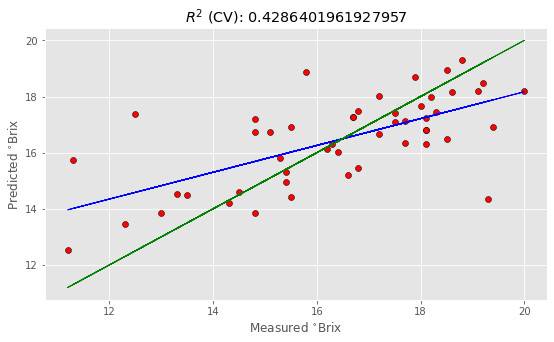

In [ ]:
predicted, r2r, r2cv, mser, mscv = pcr(X,y)
# Regression plot
z = np.polyfit(y, predicted, 1) 
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y, predicted, c='red', edgecolors='k')
    ax.plot(y, z[1]+z[0]*y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)
    plt.title('$R^{2}$ (CV): '+str(r2cv))
    plt.xlabel('Measured $^{\circ}$Brix')
    plt.ylabel('Predicted $^{\circ}$Brix')
plt.show()